# BANK LOAN STATUS PREDICTION- MACHINE LEARNING                CLASSIFICATION PROJECT

In [1]:
# Importing necessory libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
dk = pd.read_csv('loan_prediction.csv')

In [ ]:
dk1 = dk.copy()

In [3]:
dk.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dk.shape

(614, 13)

In [9]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dk.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Interpretation:** The data has 5050 observations and 23 variables.

 Let's seggergate the columns as numerical and categorical.

In [ ]:
#dk.Customer_id = df.Customer_id.astype(str)

In [5]:
df_num=dk.select_dtypes(include=[int,float])
df_cat=dk.select_dtypes(include="object")

**Get a concise summary of the DataFrame.**

In [13]:
# Summary statistics for numerical columns
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [14]:
# Summary statistics for Categorical columns
df_cat.describe().T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


**SKEWNESS**

Skewness is a statistical measure that describes the asymmetry of the probability distribution of a dataset. In the context of machine learning, understanding skewness is crucial as it can impact the performance and accuracy of various algorithms, as well as the interpretation of results.

Skewness can be categorized into three main types:

1.Positive Skewness (Right Skewness): In a positively skewed distribution, the tail on the right side is longer or fatter than the left side. This indicates that the majority of the data points are concentrated on the left side, while a few extremely high values pull the mean to the right. The median (middle value) is generally less than the mean in a positively skewed distribution.

2.Negative Skewness (Left Skewness): In a negatively skewed distribution, the tail on the left side is longer or fatter than the right side. This suggests that most of the data points are clustered on the right side, while a few very low values pull the mean to the left. The median is typically greater than the mean in a negatively skewed distribution.

3.No Skewness (Symmetric): In a symmetric distribution, the data is evenly distributed on both sides of the mean, resulting in a balanced curve without a long tail on either side. The mean and median are generally close to each other in a symmetric distribution.

In [22]:
#Skewness 
df_num.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

**Interpretation of Kurtosis in Machine Learning**

1. A **mesokurtic distribution** (kurtosis = 3) closely resembles a normal distribution.
In machine learning, data with this type of distribution might require less preprocessing or transformations when used in models that assume normality, such as linear regression.
Leptokurtic Distribution (Kurtosis > 3):

2. A **leptokurtic distribution** has heavier tails and a sharper peak than a normal distribution.
High kurtosis indicates the presence of more extreme values or outliers in the data's tails.
In machine learning, understanding leptokurtic distributions helps in detecting potential outliers and deciding on appropriate strategies for handling them, such as robust regression techniques.
Platykurtic Distribution (Kurtosis < 3):

3. A **platykurtic distribution** has lighter tails and a flatter peak compared to a normal distribution.
Low kurtosis suggests that the data has fewer extreme values and is more dispersed.
In machine learning, dealing with platykurtic distributions may require special attention when choosing algorithms and feature engineering techniques, as assumptions of normality might not hold.
Assessment of Model Assumptions:

4. Many statistical models, like linear regression, assume that the data is normally distributed. Kurtosis helps assess how well the data fits these assumptions. If the data's kurtosis significantly deviates from 3, it might indicate that the normality assumption doesn't hold, requiring model adjustments or the use of alternative algorithms.

* In summary, kurtosis is a valuable tool in machine learning for understanding the distributional characteristics of data. It guides decision-making regarding data preprocessing, outlier handling, and model selection. However, it's important to note that kurtosis is just one aspect of data analysis, and its interpretation should always be considered alongside other statistical measures and domain knowledge.

In [23]:
#kurtosis
df_num.kurt()

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

**Correlation**

* Correlation is a fundamental statistical concept widely used in machine learning to understand relationships between variables. It measures the extent to which two variables change together. In the context of machine learning, correlation helps us uncover patterns, dependencies, and potential predictive power among features, which can guide model selection, feature engineering, and interpretability.

* In machine learning, correlation is valuable for several reasons:

**Feature Selection**: Highly correlated features might carry redundant information, leading to multicollinearity. Identifying and removing such features can improve model stability and generalization.

**Feature Engineering**: Understanding how features correlate with the target variable can guide the creation of new features that capture predictive patterns more effectively.

**Model Interpretation**: Correlation analysis aids in explaining model predictions. Features with strong correlations to the target might have higher interpretability and provide insights into the underlying relationships.

**Detecting Anomalies**: Unusual correlation patterns might indicate data anomalies or measurement errors that need to be investigated further.

**Dimensionality Reduction**: Correlation information can assist in dimensionality reduction techniques like Principal Component Analysis (PCA) by selecting components that explain the most variance.

In [25]:
#Correlation
df_num.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<a id="uni"> </a>
# 1. Univariate Analysis
The univariate analysis focuses on a single variable in the data. The main purpose of this type of  analysis is to understand each variable in the data using various statistical and visualization techniques. It helps to study the pattern in each variable. The univariate analysis contains various techniques for numerical as well as a categorical variable.

In [29]:
import warnings
warnings.filterwarnings('ignore')

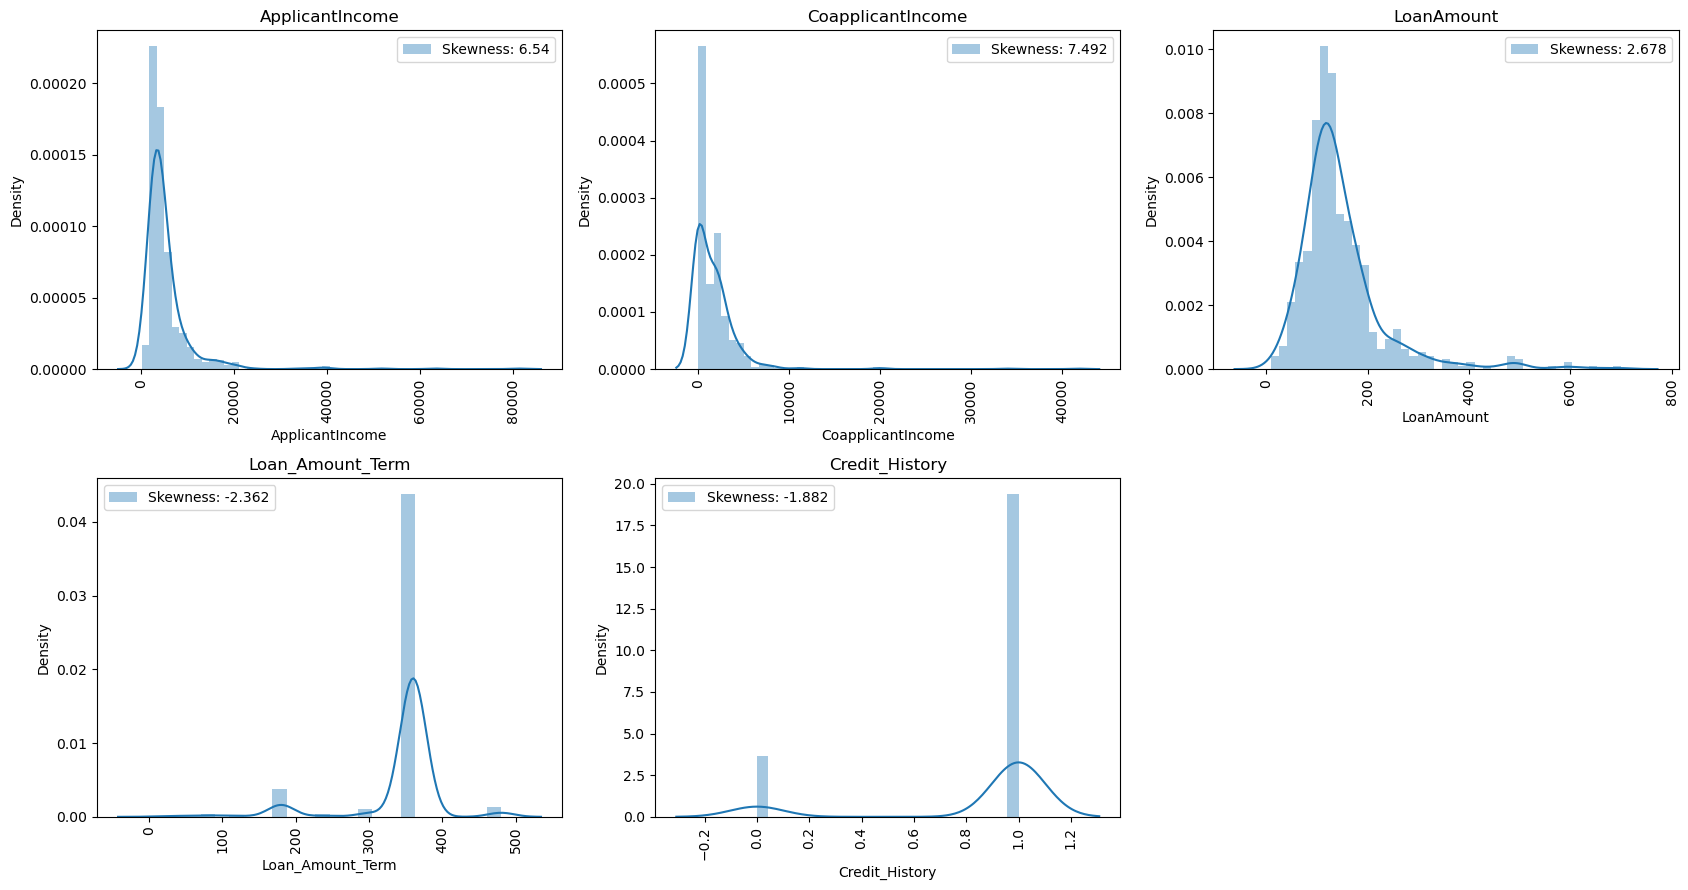

In [30]:
plt.rcParams['figure.figsize']=[17,9]
rows=2
columns=3
iterator=1
for k in df_num.columns:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df_num.loc[:,k],label= 'Skewness:'+' '+str(round(df_num[k].skew(),3)))
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()   

**Interpretation**

* Applicant Income and Coapplicant Income are  right skewed. 
* Loan amount and credit history are left skewewd.
* Loan Amount has normal distribution.

<Axes: xlabel='Gender'>

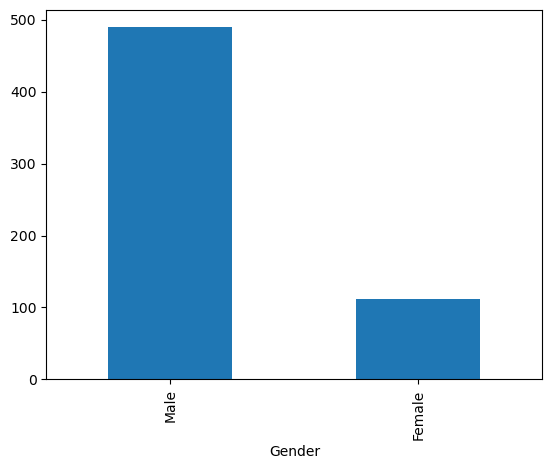

In [6]:
df_cat["Gender"].value_counts().plot(kind="bar")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


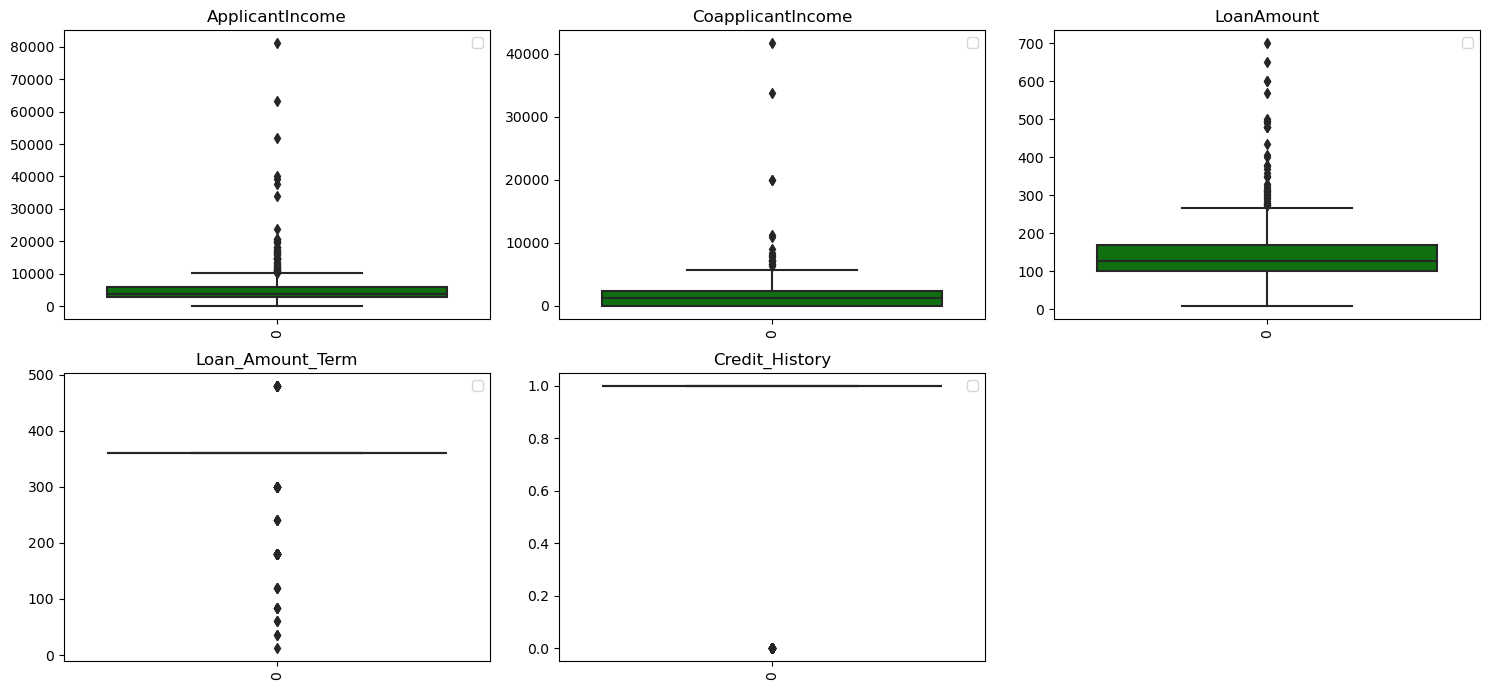

In [32]:
plt.rcParams['figure.figsize']=[15,7]
rows=2
columns=3
iterator=1
for k in df_num.columns:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(df_num.loc[:,k],color='g')
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout() 

**Interpretation**
* All numerical columns has outliers.

# Categorical Features

In [8]:
ls=list(df_cat.columns)
ls.remove('Loan_ID')
#ls.remove('Gender')

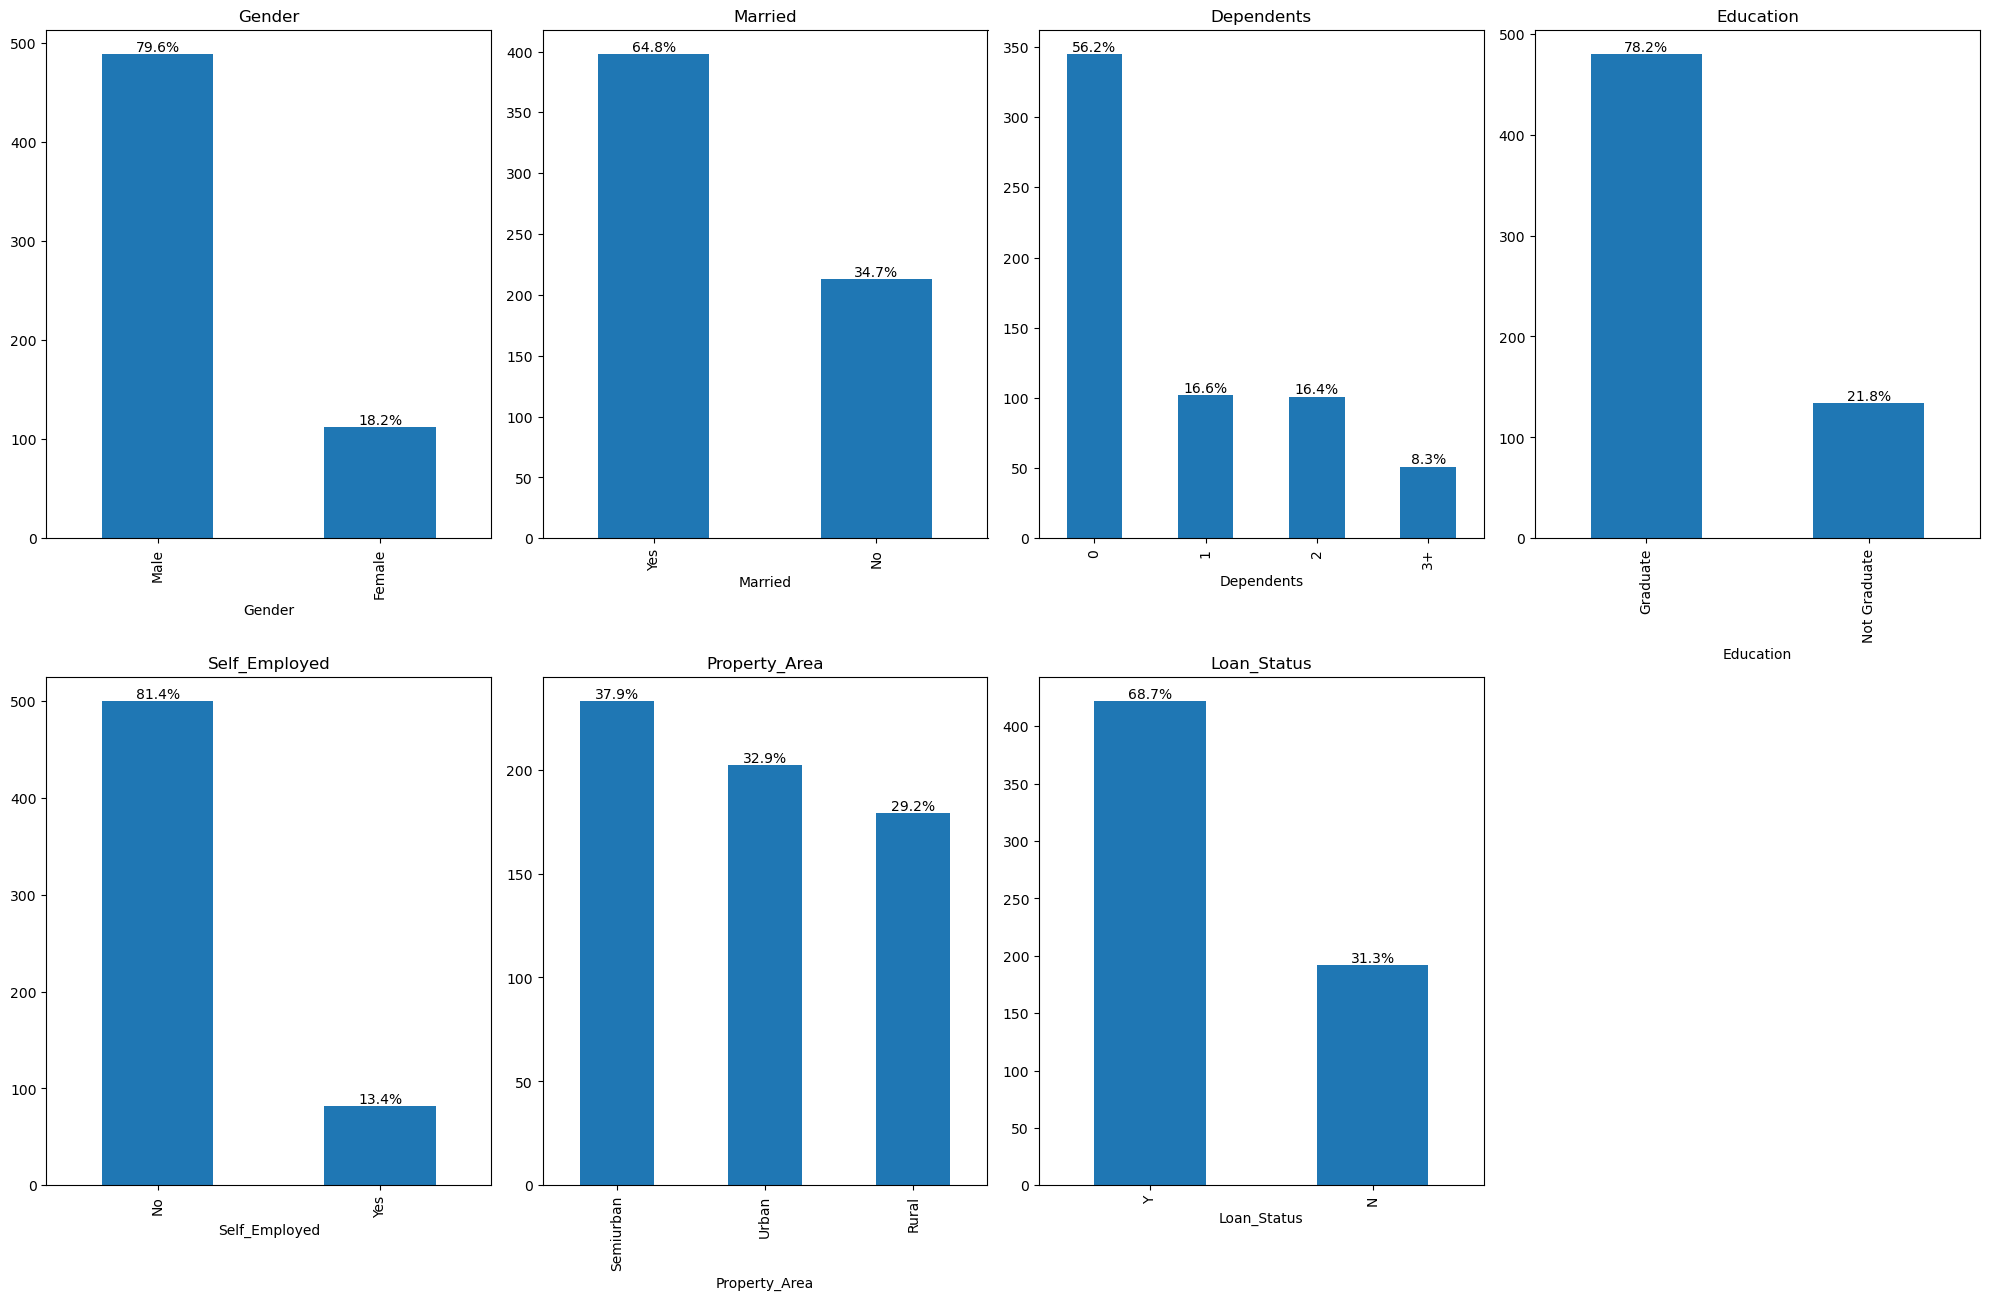

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 25]
rows = 4
columns = 4
iterator = 1

for k in ls:
    plt.subplot(rows, columns, iterator)
    #ax = sns.countplot(df_cat.loc[:, k], color='g')
    ax=df_cat.loc[:,k].value_counts().plot(kind="bar")
    plt.title(k)

    # Calculate percentages for each bar
    total_count = len(df_cat.loc[:, k])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        ax.text(x_pos, y_pos, percentage, ha='center', va='bottom')

    iterator += 1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [22]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# 2. Bivariate Analysis

Bivariate analysis is the analysis of two variables (attributes)
Now, we will explore the association between each variable of the dataset and the target variable to find the relationship between them.

<a id="types_of_bivariate_analysis"> </a>

## Types of Bivariate Analysis
<html>
<body>

<ul>
Follwing are the types of bivariate analysis:<br>
    
  1. Numerical and Numerical<br>
  2. Categorical and Numerical<br>
  3. Categorical and Categorical<br>  
  
</ul>  
</body>
</html>

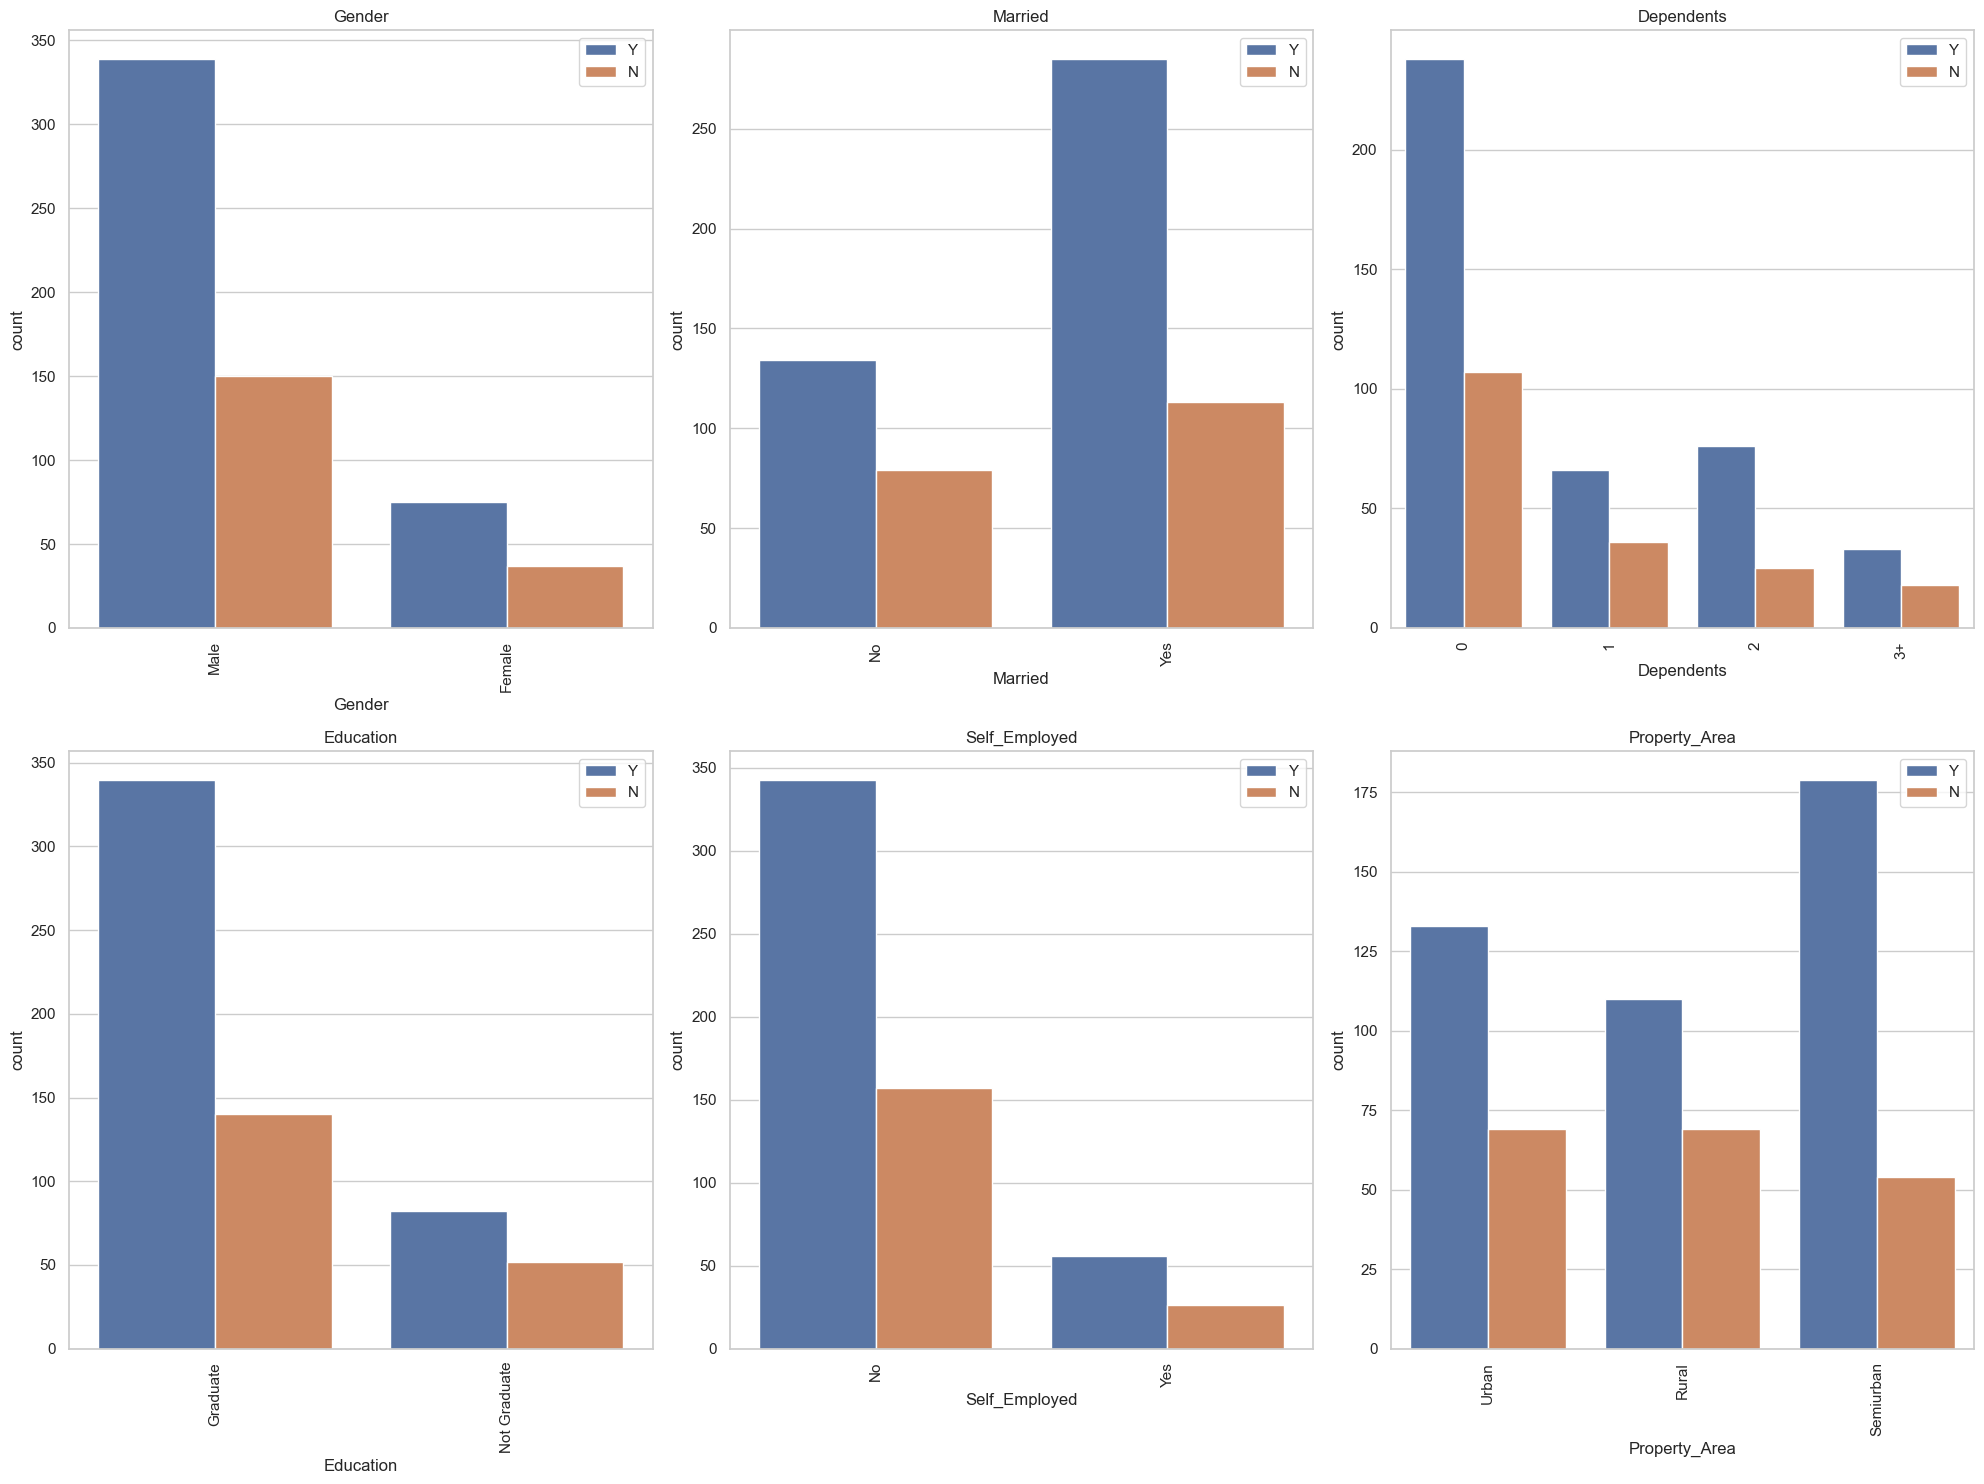

In [33]:
plt.rcParams['figure.figsize']=[20,15]
rows=2
columns=3
iterator=1
for k in ls:
    sns.set(style='whitegrid')
    plt.subplot(rows,columns,iterator)
    #sns.countplot(y=df.loc[:,k],hue=df['class'],color='g')
    #df_cat.loc[:,k].value_counts().plot(kind="bar",hue=df_cat['Loan_Status'])
    g=sns.countplot(x=df_cat.loc[:,k],hue=df_cat["Loan_Status"])
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout() 

### Applicants Income Distribution by Target Variable

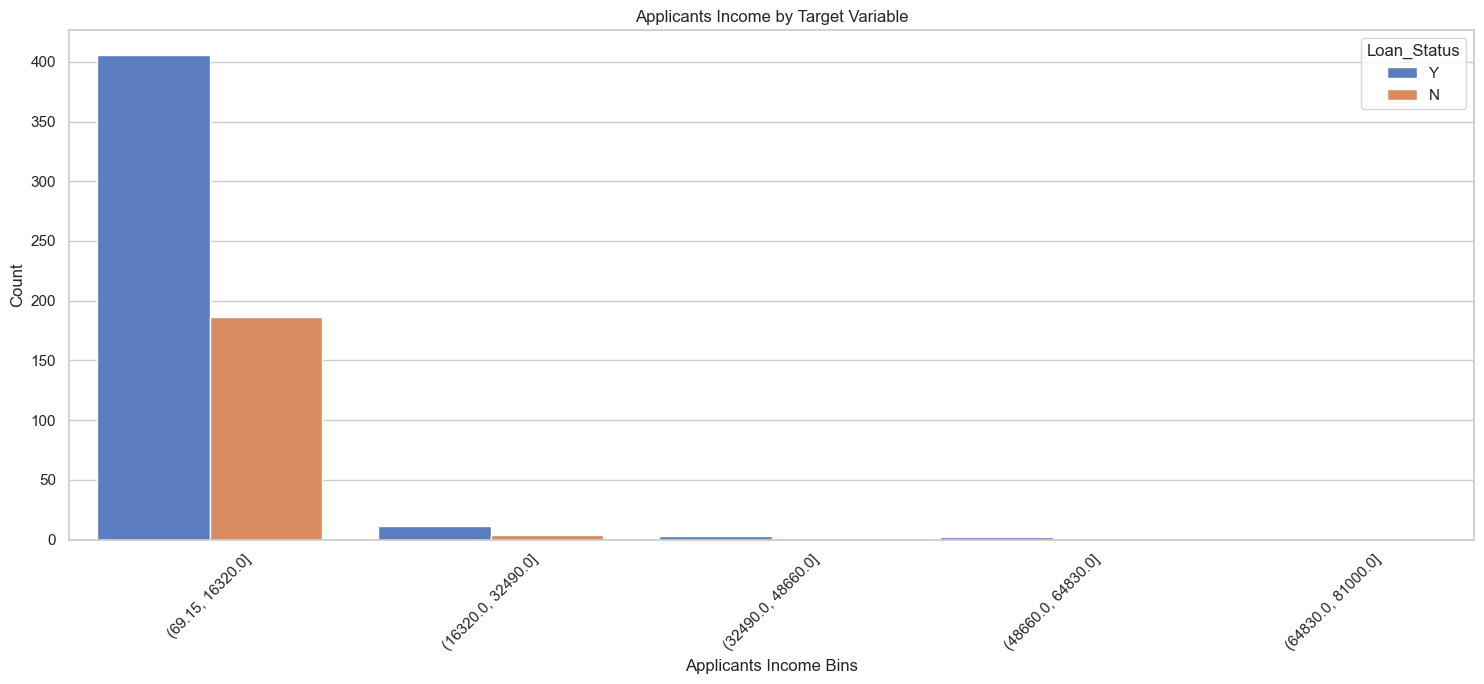

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[15,7]

# Assuming 'df' is a pandas DataFrame containing the data
# and 'age' and 'target' are columns in the DataFrame

# Define the number of bins for age distribution
num_bins = 5

# Create age bins using pandas.cut
dk['Applicant_income_bin'] = pd.cut(dk['ApplicantIncome'], bins=num_bins)

# Create the countplot
sns.countplot(x='Applicant_income_bin', hue="Loan_Status", data=dk, palette='muted')

# Add labels and title
plt.xlabel('Applicants Income Bins')
plt.ylabel('Count')
plt.title('Applicants Income Distribution by Target Variable')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

<a id="multi"> </a>
# 3. Multivariate Analysis

Multivariate analysis is used to study two or more variables in the data. The main purpose is to understand the relationship between the variables using various statistical and visualization techniques. The analysis helps to find the variables which are highly correlated to each other; also, it exhibits the effect of one variable on other variables in the data. </b>

In [39]:
dk.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Applicant_income_bin'],
      dtype='object')

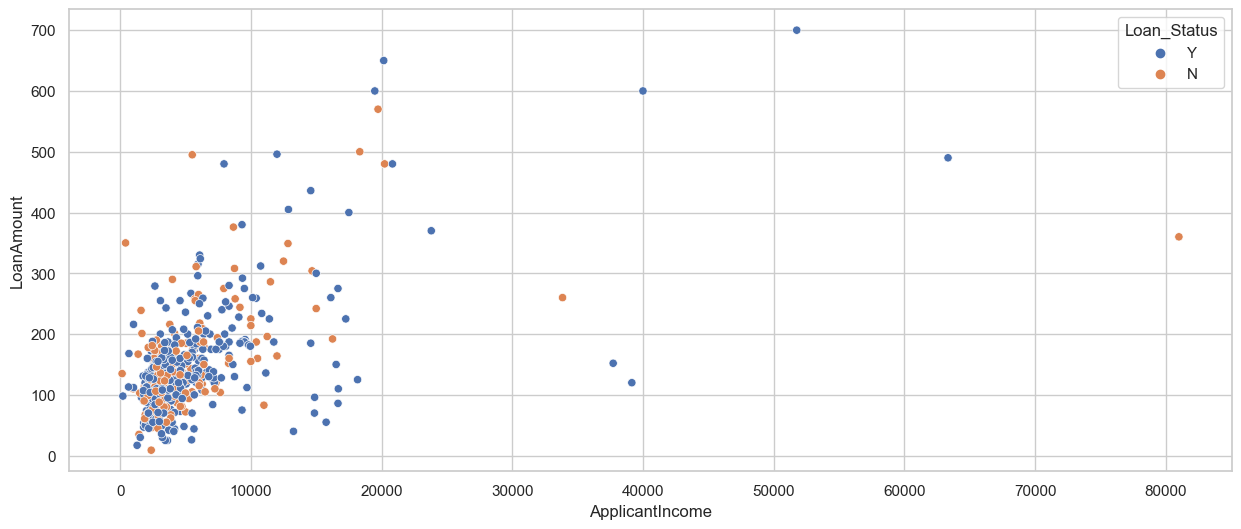

In [40]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=dk,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')
plt.show()

## 3.2 Pairplot

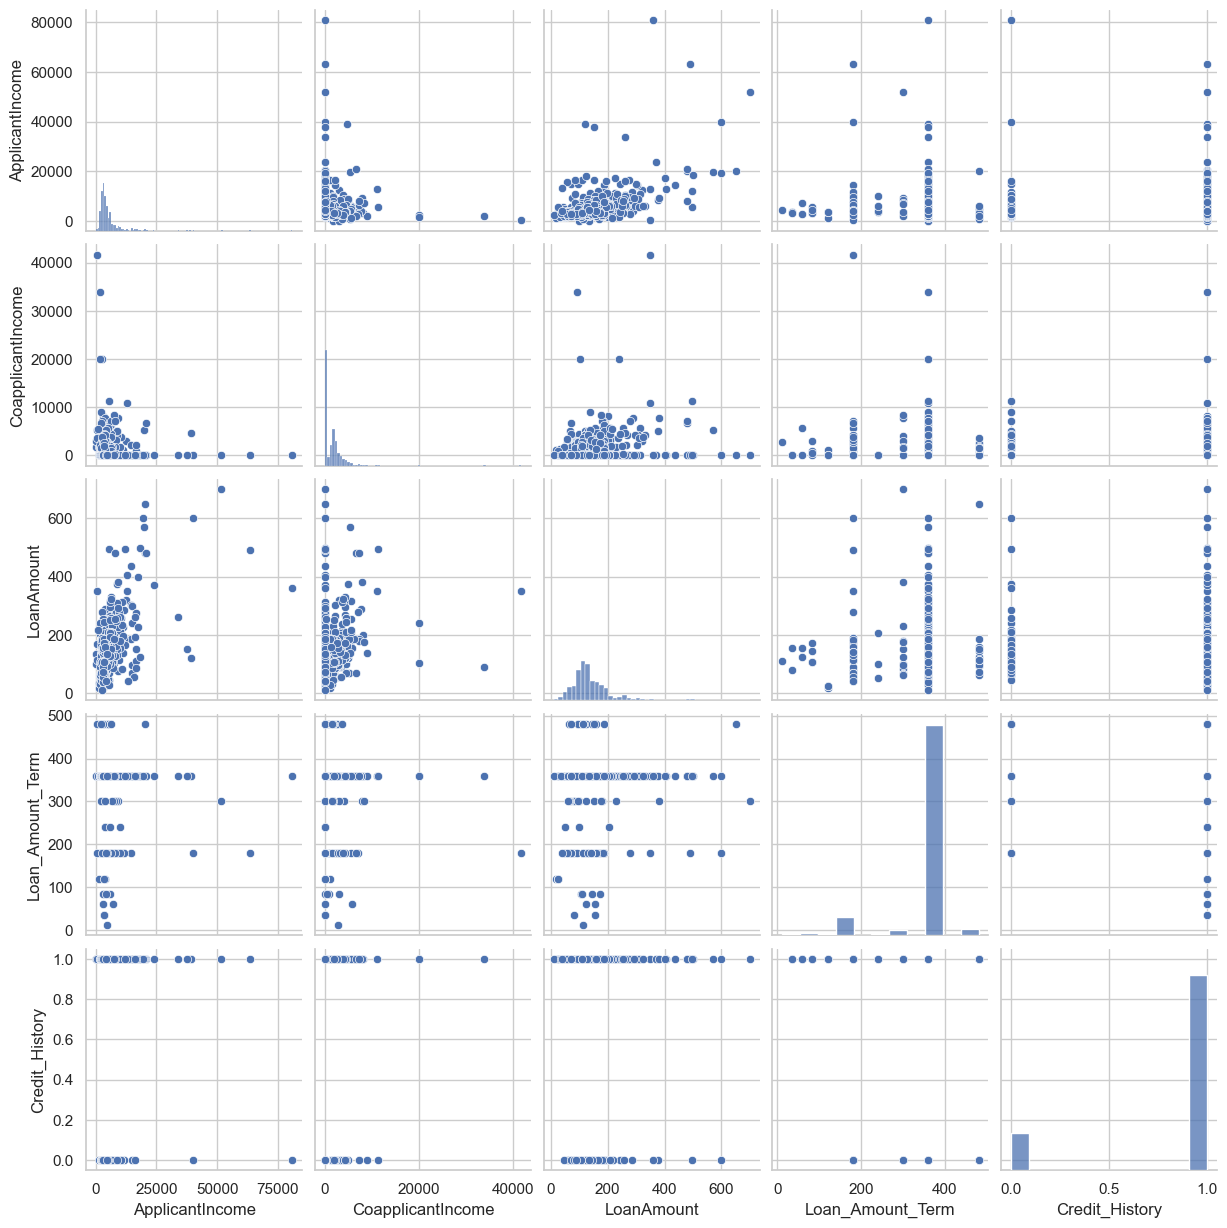

In [41]:
sns.pairplot(dk)

# 4. Null Value Analysis and Treatment

In [45]:
Total = dk.isnull().sum().sort_values(ascending=False)          
Percent = (dk.isnull().sum()*100/dk.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


**Interpretation -** There are few null values in columns Credit-history,Self-employed,Loan Amount, dependants, loan amount term. 

In [5]:
print(dk.groupby('Self_Employed')['Self_Employed'].count())
print(dk.groupby('Credit_History')['Credit_History'].count())

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Credit_History
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [46]:
#To reomive loanid column which is unnecessory
dk = dk.drop('Loan_ID',axis = 1)
dk.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Applicant_income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,"(69.15, 16320.0]"


In [47]:
# To remove nullvalues in less than 5% nullpercentcolumns
nacolumns=['Gender','Married','Dependents','LoanAmount','Loan_Amount_Term']
dk=dk.dropna(subset=nacolumns)

In [48]:
print(dk.isnull().sum() * 100/len(dk))

Gender                  0.000000
Married                 0.000000
Dependents              0.000000
Education               0.000000
Self_Employed           5.424955
ApplicantIncome         0.000000
CoapplicantIncome       0.000000
LoanAmount              0.000000
Loan_Amount_Term        0.000000
Credit_History          8.679928
Property_Area           0.000000
Loan_Status             0.000000
Applicant_income_bin    0.000000
dtype: float64


In [49]:
#To fill null values with max frequency values
print(dk['Self_Employed'].mode())

0    No
Name: Self_Employed, dtype: object


In [50]:
dk['Self_Employed']=dk['Self_Employed'].fillna(dk['Self_Employed'].mode()[0])

In [51]:
print(dk.groupby('Credit_History')['Credit_History'].count())
dk['Credit_History']=dk['Credit_History'].fillna(dk['Credit_History'].mode()[0])

Credit_History
0.0     71
1.0    434
Name: Credit_History, dtype: int64


In [52]:
Total = dk.isnull().sum().sort_values(ascending=False)          
Percent = (dk.isnull().sum()*100/dk.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0
Credit_History,0,0.0


Now all the null values were removed

<a id="outliers"></a>
# 5. Outliers

An outlier is an observation in the data that lies at an abnormal distance from other values. Presence of an outlier may skew the results. Hence it is necessary to remove them.

# Identifying the Outliers

## 5.1 Based on Boxplots:

The boxplot() in seaborn plots a box plot of the specified data. The box represents the quartiles of the data while the whiskers extend to show the rest of the distribution. The points that are determined to be outliers are identified using  the interquartile range (IQR) method.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


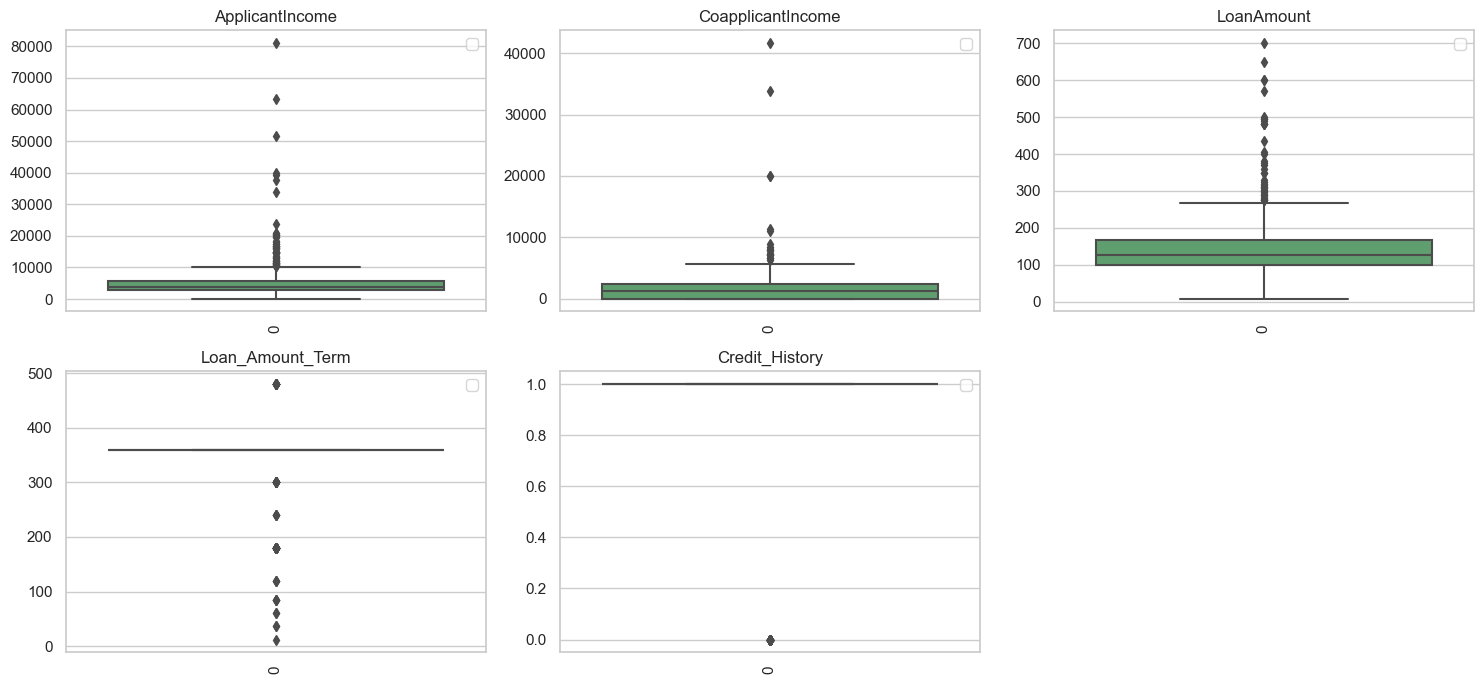

In [54]:
plt.rcParams['figure.figsize']=[15,7]
rows=2
columns=3
iterator=1
for k in df_num.columns:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(df_num.loc[:,k],color='g')
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()

<a id="iqr"></a>
## 5.2. Based on IQR

The IQR method can be used when the data distribution in non-normal. Also the quartiles are less affected by the extreme values.

In [55]:
dk.shape

(553, 13)

In [56]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
dk = dk[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
dk.shape

(367, 13)

In [59]:
dk1.shape

(614, 13)

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scalled_df=sc.fit_transform(df_num)
scalled_df=pd.DataFrame(scalled_df,columns=df_num.columns)

In [62]:
scalled_df = scalled_df[((scalled_df<3)|(scalled_df>-3))]

Outiers identified using Z-Score

In [53]:
#check some numerical columns and change any symbols if present
dk.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Applicant_income_bin
67,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y,"(69.15, 16320.0]"
233,Female,No,0,Graduate,No,8333,0.0,280.0,360.0,1.0,Semiurban,Y,"(69.15, 16320.0]"
299,Male,Yes,1,Graduate,No,2014,2925.0,113.0,360.0,1.0,Urban,N,"(69.15, 16320.0]"
368,Male,Yes,1,Graduate,No,6325,0.0,175.0,360.0,1.0,Semiurban,Y,"(69.15, 16320.0]"
12,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,"(69.15, 16320.0]"


In [64]:
# Handling common errors:
print(dk['Dependents'].unique())

['1' '0' '2' '3+']


In [65]:
dk['Dependents'] = dk['Dependents'].replace(to_replace='3+',value='4')
print(dk['Dependents'].unique())

['1' '0' '2' '4']


In [66]:
print(dk['Property_Area'].unique())

['Rural' 'Urban' 'Semiurban']


##  Encoding the Categorical Variables

The data may contain numerical as well as categorical variables. Machine learning algorithms are designed to work with numerical data. Thus, it is necessary to convert the categorical variables into a numeric type. Different techniques are available to perform such conversion.

## Ordinal encoding

Ordinal encoding can be used to encode the ordinal variable with the values from 0 to (n-1) for 'n' distinct categories. We can pass the order to the encoder to assign the categories in the variable. 

## Label encoding

In [67]:
#To convert categorical into numerical
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
dk['Property_Area'] = lr.fit_transform(dk['Property_Area'])
dk['Gender'] = lr.fit_transform(dk['Gender'])
dk['Married'] = lr.fit_transform(dk['Married'])
dk['Education'] = lr.fit_transform(dk['Education'])
dk['Self_Employed'] = lr.fit_transform(dk['Self_Employed'])
dk['Loan_Status'] = lr.fit_transform(dk['Loan_Status'])

In [68]:
dk.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Applicant_income_bin
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,"(69.15, 16320.0]"
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,"(69.15, 16320.0]"
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,"(69.15, 16320.0]"
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,"(69.15, 16320.0]"
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,"(69.15, 16320.0]"
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,"(69.15, 16320.0]"
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,"(69.15, 16320.0]"
10,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1,"(69.15, 16320.0]"
11,1,1,2,0,0,2500,1840.0,109.0,360.0,1.0,2,1,"(69.15, 16320.0]"
13,1,0,0,0,0,1853,2840.0,114.0,360.0,1.0,0,0,"(69.15, 16320.0]"


In [69]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 1 to 612
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                367 non-null    int32   
 1   Married               367 non-null    int32   
 2   Dependents            367 non-null    object  
 3   Education             367 non-null    int32   
 4   Self_Employed         367 non-null    int32   
 5   ApplicantIncome       367 non-null    int64   
 6   CoapplicantIncome     367 non-null    float64 
 7   LoanAmount            367 non-null    float64 
 8   Loan_Amount_Term      367 non-null    float64 
 9   Credit_History        367 non-null    float64 
 10  Property_Area         367 non-null    int32   
 11  Loan_Status           367 non-null    int32   
 12  Applicant_income_bin  367 non-null    category
dtypes: category(1), float64(4), int32(6), int64(1), object(1)
memory usage: 29.3+ KB


In [70]:
dk[['ApplicantIncome','CoapplicantIncome']].describe()

,ApplicantIncome,CoapplicantIncome
count,367.000000,367.000000
mean,4091.656676,1342.008501
std,1879.892583,1414.570986
min,150.000000,0.000000
25%,2766.000000,0.000000
50%,3675.000000,1302.000000
75%,4940.500000,2216.000000
max,10139.000000,5625.000000


## Correlation Heatmap

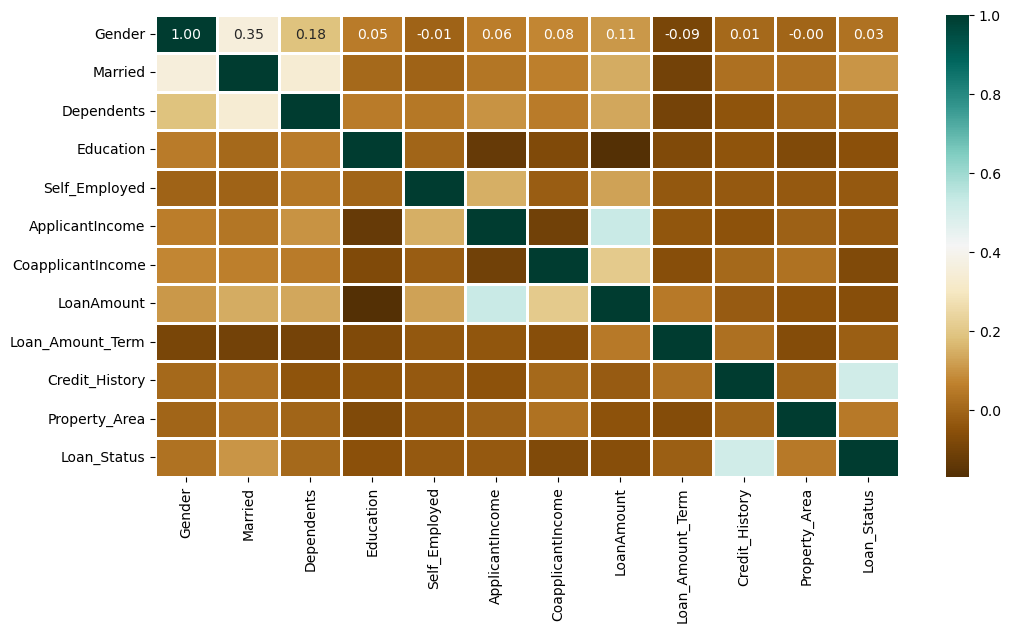

In [21]:
# heatmap to see corelation b/w features.
plt.figure(figsize=(12,6))
sns.heatmap(dk.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)
plt.show()

In [71]:
# Defining feature column and Target column
x = dk.drop('Loan_Status',axis=1)
y = dk['Loan_Status']

## Scale the data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

## Standard Scaler

The StandardScaler() is present in the sklearn library that normalizes the data such that the mean is zero and standard deviation is 1. This method does not change the shape of the original distribution.

In [75]:
# scaling of the features: 
sccol = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x[sccol] = st.fit_transform(x[sccol])
x[sccol]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
1,0.261725,0.117504,-0.027243,0.0
2,-0.581494,-0.949999,-1.343335,0.0
3,-0.803618,0.719213,-0.197061,0.0
4,1.016520,-0.949999,0.248712,0.0
5,0.705973,2.020321,2.923352,0.0
...,...,...,...,...
607,-0.055748,0.048839,0.588349,0.0
608,-0.457915,0.430393,-0.451789,0.0
609,-0.634762,-0.949999,-1.237199,0.0
611,2.120215,-0.780104,2.626170,0.0


In [74]:
dk.to_csv('preprocessed_data_loan.csv',index=False)

In [25]:
import warnings
warnings.filterwarnings('ignore')

#Model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [26]:
modelset ={}
def model_acscore(model,x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=42)
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    print(f'{model} accuracy is {accuracy_score(ytest,y_pred)}')

    score = cross_val_score(model,x,y,cv=5)
    print(f'{model} Avg crossvalscore is {np.mean(score)}')
    modelset[model] = round(np.mean(score)*100,2)

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model_acscore(model1,x,y)
print(modelset)

LogisticRegression() accuracy is 0.7927927927927928
LogisticRegression() Avg crossvalscore is 0.802964782964783
{LogisticRegression(): 80.3}


In [28]:
# Support vector machine
from sklearn import svm
model2 = svm.SVC()
model_acscore(model2,x,y)

SVC() accuracy is 0.8018018018018018
SVC() Avg crossvalscore is 0.7920720720720721


In [29]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model_acscore(model3,x,y)

DecisionTreeClassifier() accuracy is 0.7207207207207207
DecisionTreeClassifier() Avg crossvalscore is 0.7015397215397214


In [30]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model_acscore(model4,x,y)

RandomForestClassifier() accuracy is 0.7747747747747747
RandomForestClassifier() Avg crossvalscore is 0.7848484848484848


In [31]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier()
model_acscore(model5,x,y)

GradientBoostingClassifier() accuracy is 0.7747747747747747
GradientBoostingClassifier() Avg crossvalscore is 0.7739885339885341


In [32]:
print(modelset)
print('****************************')

{LogisticRegression(): 80.3, SVC(): 79.21, DecisionTreeClassifier(): 70.15, RandomForestClassifier(): 78.48, GradientBoostingClassifier(): 77.4}
****************************


In [33]:
# Hyper parameter tuning for logistic reg
from sklearn.model_selection import RandomizedSearchCV
logr_para={'C':np.logspace(-4,4,20),
           'solver': ['liblinear','lbfgs','newton-cholesky']}
rs_logr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=logr_para,
                           n_iter=20,cv=5,verbose=True)
rs_logr.fit(x,y)
print(rs_logr.best_score_)
print(rs_logr.best_params_)
print('************************')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.802964782964783
{'solver': 'liblinear', 'C': 3792.690190732246}
************************


In [34]:
# Hyper parameter tuning for svm model
svm_para={'C':[0.25,0.50,0.75,1],
          'kernel':['linear','rbf']}
rs_svm = RandomizedSearchCV(svm.SVC(),param_distributions=svm_para,
                            cv=5,n_iter=20,verbose=True)
rs_svm.fit(x,y)
print(rs_svm.best_score_)
print(rs_svm.best_params_)
print('***********************')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8066011466011467
{'kernel': 'linear', 'C': 0.25}
***********************


In [35]:
 # Hyper parameter for Random forest classifier
rf_para = {'n_estimators':np.arange(10,1000,10),
           'max_features':['auto','sqrt'],
           'max_depth':[None,3,5,10,20,30],
           'min_samples_split':[2,5,20,50,100],
           'min_samples_leaf':[1,2,5,10]}

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_para,
                           cv=5,n_iter=20,verbose=True)
rs_rf.fit(x,y)
print(rs_rf.best_score_)
print(rs_rf.best_params_)
print('***********************')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8066011466011467
{'n_estimators': 190, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3}
***********************


# selecting Random forest as final best model and use its best parameters
# so we selected Random forest classifier is the best model for this dataset
  # its accuracy score is 80.84

In [36]:
rf_final =RandomForestClassifier(n_estimators=270,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           max_features='sqrt',
                           max_depth=5)
rf_final.fit(x,y)
model_acscore(rf_final,x,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270) accuracy is 0.8018018018018018
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270) Avg crossvalscore is 0.8066011466011467


In [38]:
# save this final model using joblib
import joblib
joblib.dump(rf_final,'D:\\Downloads\\joblib_loan_predict2')
model11=joblib.load('D:\\Downloads\\joblib_loan_predict2')

In [39]:
dfpred = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1},index=[0])
target=model11.predict(dfpred)
if target ==1:print('loan will be approved')
else: print('loan can not be approved')

loan can not be approved
